### **GRIP**: **The Spark Foundation**
# **DATA SCIENCE AND BUSINESS ANALYTICS - INTERNSHIP**
## By **Anna Elsa Luiz**
### **TASK 1** : **Prediction using Supervised ML**
*(Predict the percentage of a student based on the number of study hours.)*


In [2]:
#Importing the required libraries.
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

# **Reading data from the given URL**

In [3]:
url = "http://bit.ly/w-data"
init_data= pd.read_csv(url)
print("Data imported successfully")


#Displaying first ten records of the data
init_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#Printing the shape and summary of data
print("Shape:",init_data.shape)
print("Summary:")
init_data.describe()

Shape: (25, 2)
Summary:


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Plotting the data on Graphs**

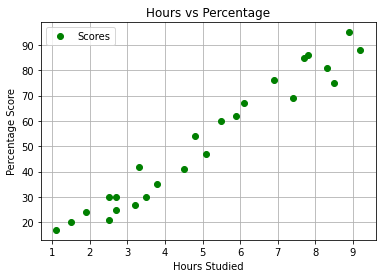

In [5]:
#Plotting the distribution of scores
init_data.plot(x='Hours', y='Scores', style='o',color='green')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

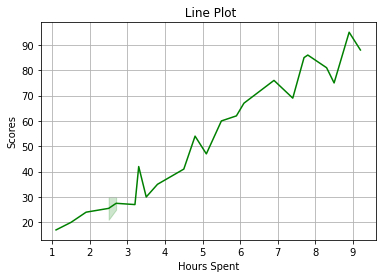

In [6]:
sns.lineplot(x='Hours',y='Scores',color='green',data=init_data) 
plt.xlabel('Hours Spent')
plt.ylabel('Scores')
plt.title(' Line Plot')
plt.grid()

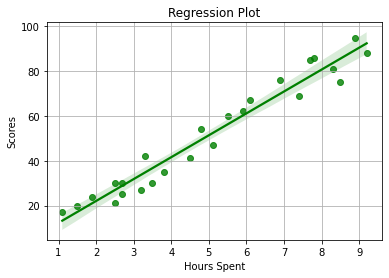

In [7]:
sns.regplot(x='Hours',y='Scores',color='green',data=init_data)
plt.xlabel('Hours Spent')
plt.ylabel('Scores')
plt.title('Regression Plot')
plt.grid()

# **Preparing the Data**

In [8]:
#dividing the data into "attributes" (inputs) and "labels" (outputs)
X = init_data.iloc[:, :-1].values  
y = init_data.iloc[:, 1].values  

In [9]:
 #split this data into training and test sets
 from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 


# **Linear Regression model**

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


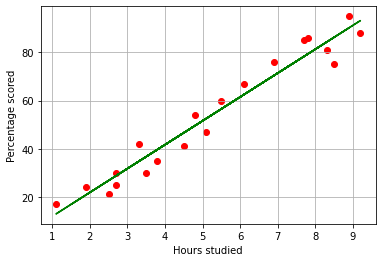

In [11]:
# Plotting the regression line on training data

#the line equation is in the form of Y=mX+c
line = regressor.coef_*X+regressor.intercept_ 

# Plotting for the test data
plt.scatter(X_train, y_train,color='red')
plt.plot(X, line,color='green');
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.grid()

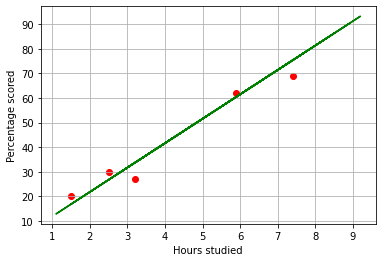

In [12]:
# Plotting the regression line on test data

line = regressor.coef_*X+regressor.intercept_ #the line equation is in the form of Y=mX+c

# Plotting for the test data
plt.scatter(X_test, y_test,color='red')
plt.plot(X, line,color='green');
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.grid()

# **Making Predictions**

In [13]:
#prediction
print('Predictions')

print(X_test) # Testing data - In Hours

y_pred = regressor.predict(X_test) # Predicting the scores

print(y_pred)
print(y_test)


Predictions
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
[20 27 69 30 62]


In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
#finding the model accuracy
from sklearn import metrics
accuracy=metrics.r2_score(y_test,y_pred)
print("Accuracy Score of Model: ",accuracy*100,'%')

Accuracy Score of Model:  94.54906892105353 %


***Predicted score if a student studies for 9.25hrs/day.***

In [16]:
# Predicting the given data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format([[hours]]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


# **Evaluating the model**

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))


Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
